In [1]:
import pandas as pd 

In [3]:
basket = pd.read_csv(r'C:\Users\SWARAJ\Documents\ML_Lab\Datasets\Market_Basket_Optimisation.csv', header = None)

In [4]:
basket.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(basket)

7501

In [6]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [7]:
basket.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [8]:
transactions = []
for i in range(0, 7501):
    transactions.append([str(basket.values[i,j]) for j in range(0, 20)])

In [9]:
from apyori import apriori
tran_rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [10]:
results = list(tran_rules)

In [11]:
print(results[:10])

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]), RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]), RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]), RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0.24

In [12]:
def inspect(results):
 lhs = [tuple(result[2][0][0])[0] for result in results]
 rhs = [tuple(result[2][0][1])[0] for result in results]
 supports = [result[1] for result in results]
 confidences = [result[2][0][2] for result in results]
 lifts = [result[2][0][3] for result in results]
 return list(zip(lhs, rhs, supports, confidences, lifts))

In [13]:
import pandas as pd


In [14]:
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['left side', 'right side', 'support', 'confidence', 'lift'])

In [15]:
resultsinDataFrame.nlargest(n = 10, columns = 'confidence')

,left side,right side,support,confidence,lift
14,cereals,spaghetti,0.003066,0.676471,3.885303
70,cereals,nan,0.003066,0.676471,3.885303
63,olive oil,spaghetti,0.004399,0.611111,3.509912
134,olive oil,nan,0.004399,0.611111,3.509912
22,ground beef,spaghetti,0.004799,0.571429,3.281995
85,ground beef,nan,0.004799,0.571429,3.281995
76,ground beef,spaghetti,0.003066,0.534884,3.072100
93,ground beef,spaghetti,0.003066,0.534884,3.072100
138,ground beef,nan,0.003066,0.534884,3.072100
147,ground beef,spaghetti,0.003066,0.534884,3.072100


In [16]:
resultsinDataFrame.nlargest(n = 10, columns = 'support')

,left side,right side,support,confidence,lift
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
43,herb & pepper,ground beef,0.015998,0.323450,3.291994
30,spaghetti,ground beef,0.008666,0.311005,3.165328
95,spaghetti,ground beef,0.008666,0.311005,3.165328
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
60,whole wheat pasta,nan,0.007999,0.271493,4.130772
34,mineral water,frozen vegetables,0.007199,0.305085,3.200616
55,milk,olive oil,0.007199,0.203008,3.082509
102,mineral water,nan,0.007199,0.305085,3.200616
128,milk,nan,0.007199,0.203008,3.088761


<BarContainer object of 160 artists>

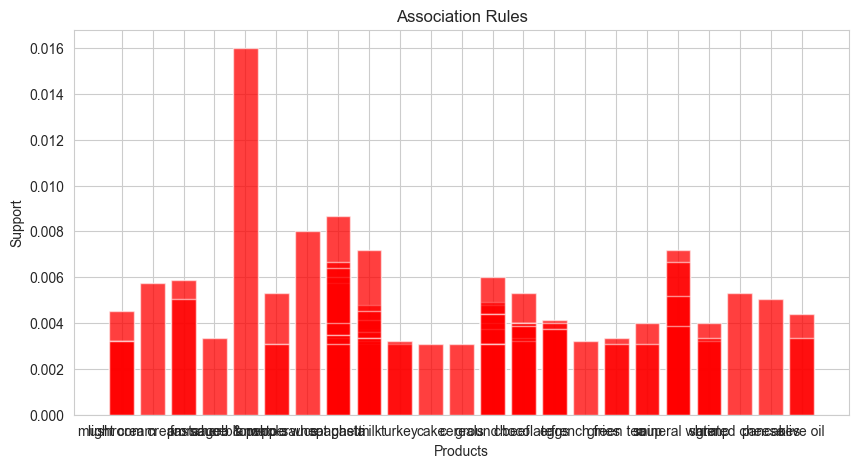

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.title('Association Rules')
plt.xlabel('Products')
plt.ylabel('Support')
plt.bar(resultsinDataFrame['left side'], resultsinDataFrame['support'], color='red', alpha=0.5, align='center')